# Autoregressive Model 

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt, dates as mdates, ticker as mticker
import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../../My-Code/')

import timetools as tt

%matplotlib inline
%matplotlib inline

In [2]:
# plt.rcParams['figure.figsize'] = (10, 7.5)
plt.style.use('seaborn')

## Simulate AR(2) Process 

$ y_t = 0.33y_{t-1} + 0.5y_{t-2} $

In [3]:
ar2 = np.array([1, 0.33, 0.5])
ma2 = np.array([1, 0, 0])

In [4]:
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

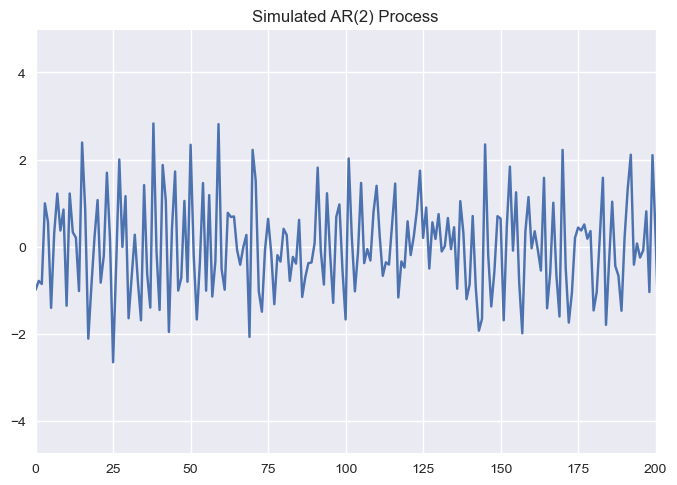

In [5]:
plt.plot(AR2_process)
plt.title('Simulated AR(2) Process')
plt.xlim(0, 200)
plt.show()

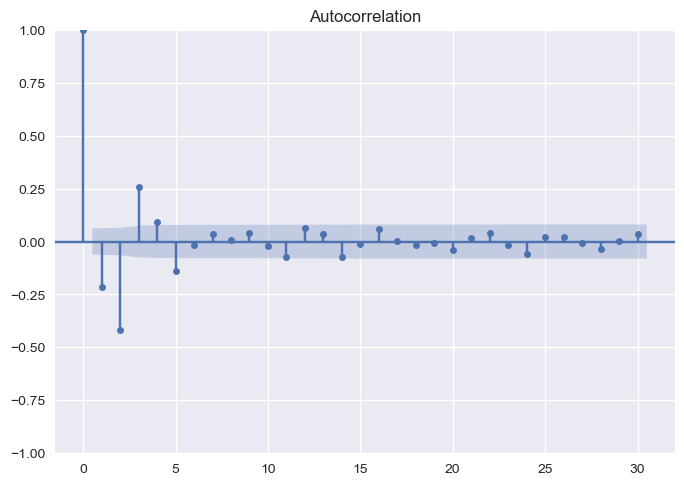

In [6]:
plot_acf(AR2_process);

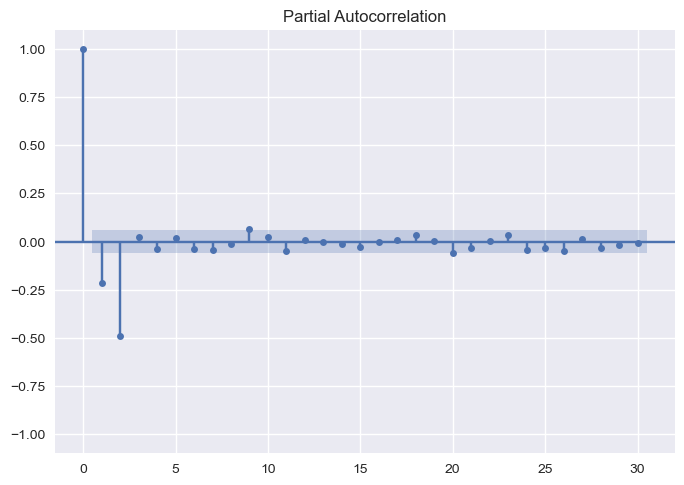

In [7]:
plot_pacf(AR2_process)
plt.ylim(-1.1, 1.1);

In [8]:
rho, sigma = yule_walker(AR2_process, 2, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.3194121  0.48794184]
sigma: 0.9851738389974593


## Simulate AR(3) Process 

$ y_t = 0.33y_{t-1} + 0.5y_{t-2} + 0.07y_{t-3} $

In [9]:
ar3 = np.array([1, 0.33, 0.5, 0.07])
ma3 = np.array([1, 0, 0, 0])

In [10]:
AR3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=10000)

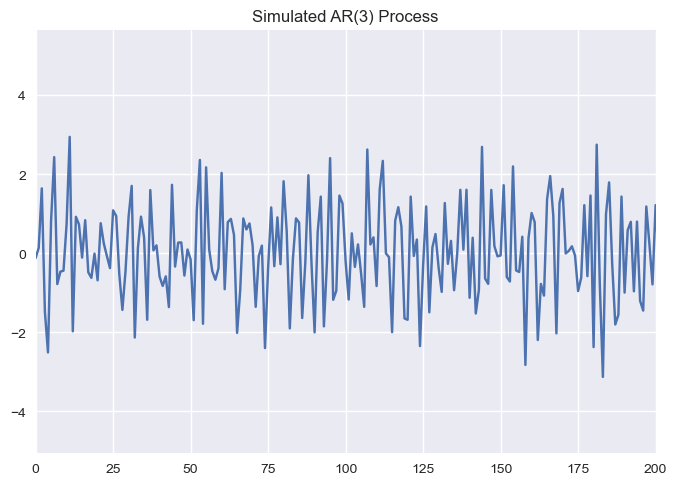

In [11]:
plt.plot(AR3_process)
plt.title('Simulated AR(3) Process')
plt.xlim(0, 200)
plt.show()

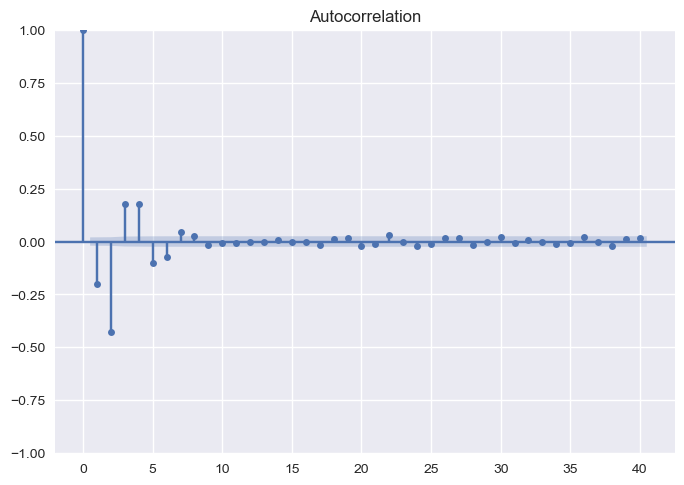

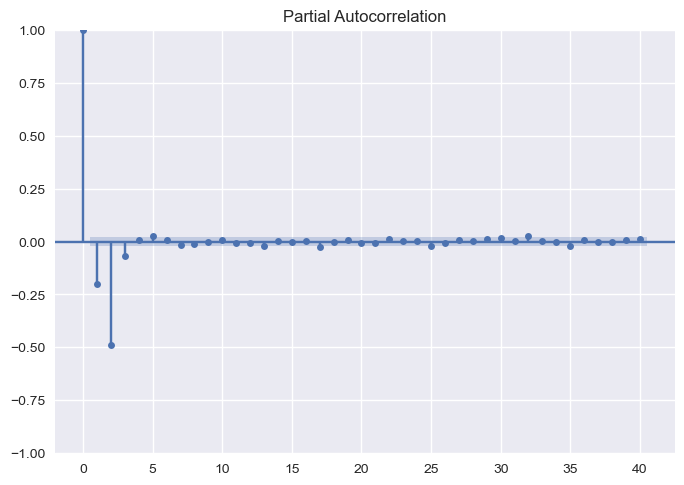

In [12]:
plot_acf(AR3_process);
plot_pacf(AR3_process);

In [13]:
rho, sigma = yule_walker(AR3_process, 3, method='mle')

print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.33358668 0.50959983 0.06842462]
sigma: 1.0054401486596996


The `sigma2` output in the coefficients table is the estimate of the variance of the error term.
https://github.com/statsmodels/statsmodels/issues/2507 

In [14]:
model_ar3 = ARIMA(AR3_process, order=(3,0,0), enforce_stationarity=False).fit()
print(model_ar3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -14239.059
Date:                Sat, 07 Jan 2023   AIC                          28488.117
Time:                        15:58:20   BIC                          28524.167
Sample:                             0   HQIC                         28500.320
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0076      0.005      1.440      0.150      -0.003       0.018
ar.L1         -0.3338      0.010    -33.215      0.000      -0.353      -0.314
ar.L2         -0.5098      0.009    -54.699      0.0

# Mini Project: Model Johnson&Johnson Quarterly Earnings per Share (EPS) 

In [15]:
data = pd.read_csv('../data/jj.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 1960-01-01 to 1980-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    84 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


,data
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61


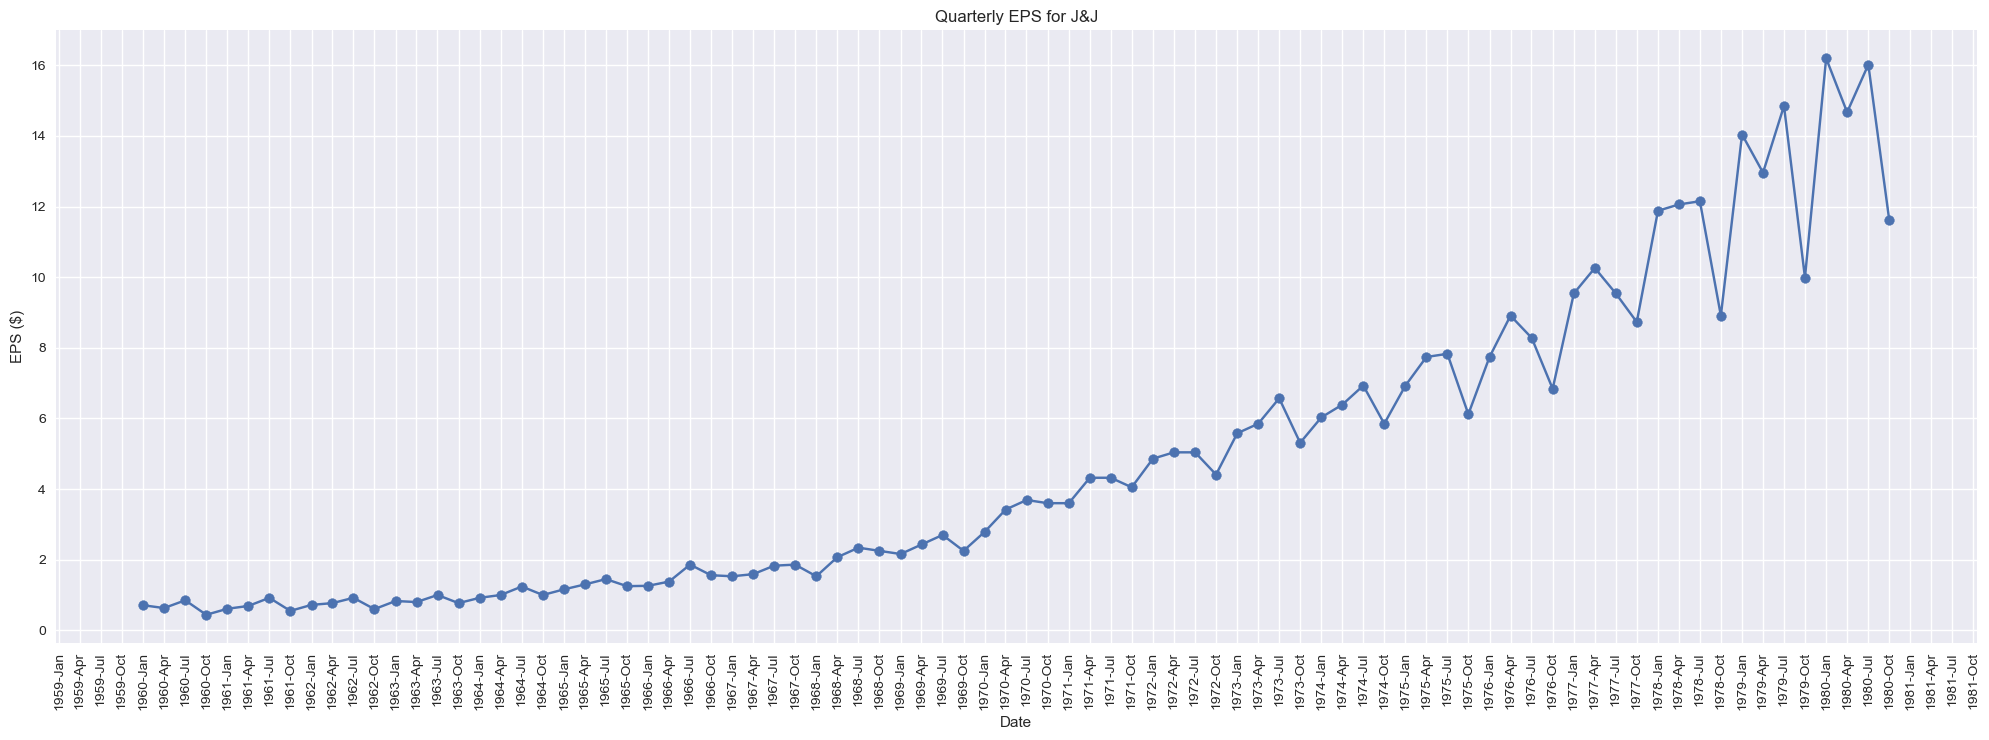

In [16]:
fig, ax = plt.subplots(figsize=(20, 7.5))
ax.scatter(data.index, data['data'])
ax.plot(data['data'])
ax.xaxis.set_major_locator(mdates.MonthLocator([1,4,7,10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
ax.set_title('Quarterly EPS for J&J')
ax.set_ylabel('EPS ($)')
ax.set_xlabel('Date')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [17]:
# Take the log difference

data['data_log'] = np.log(data['data'])
data['data_log_diff'] = data['data_log'].diff()
data = data.drop(data.index[0])

data.head()

,data,data_log,data_log_diff
date,,,
1960-04-01,0.63,-0.462035,-0.119545
1960-07-02,0.85,-0.162519,0.299517
1960-10-01,0.44,-0.820981,-0.658462
1961-01-01,0.61,-0.494296,0.326684
1961-04-02,0.69,-0.371064,0.123233


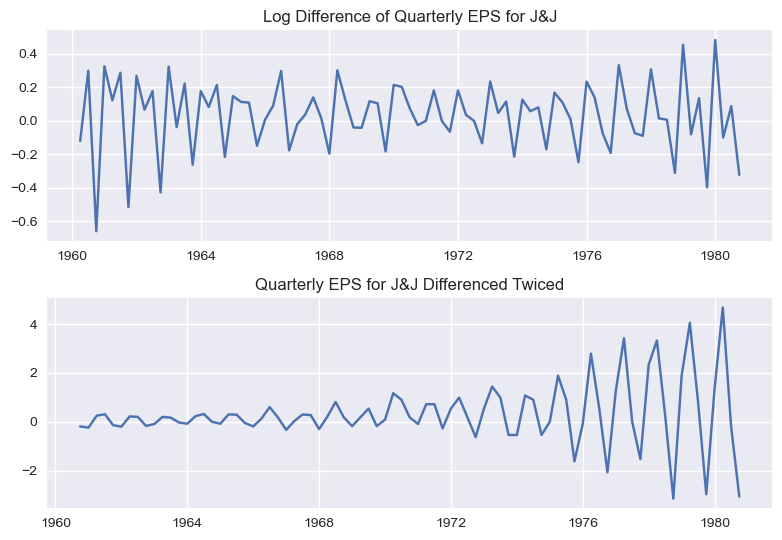

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(data['data_log_diff'])
ax1.set_title('Log Difference of Quarterly EPS for J&J')
ax2.plot(data['data'].diff(2))
ax2.set_title('Quarterly EPS for J&J Differenced Twiced')
plt.tight_layout()
plt.show()

In [19]:
tt.adf_v2(data['data_log_diff'], diff=0)

Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Differenced?  d=0

Test Statistic                 -4.317044
p-value                         0.000415
#Lags Used                      5.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64

The time series is stationary.


In [20]:
tt.adf_v2(data['data'], diff=2)

Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Differenced?  d=2

Test Statistic                 -3.556596
p-value                         0.006647
#Lags Used                      9.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64

The time series is stationary.


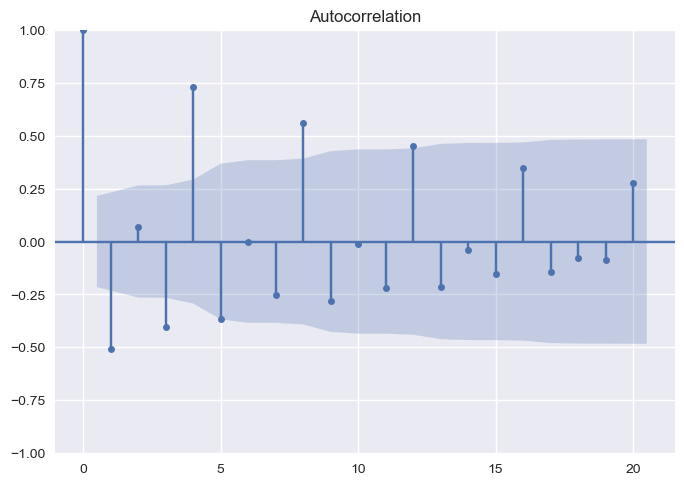

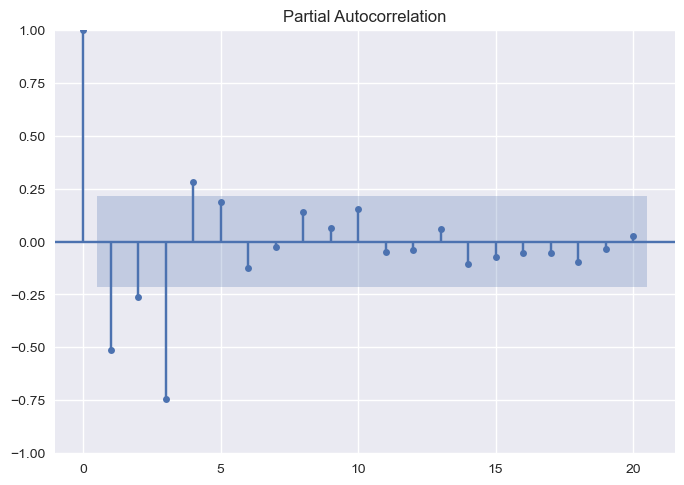

In [25]:
plot_acf(data['data_log_diff']);
plot_pacf(data['data_log_diff']);

In [22]:
# Try AR(4)

rho, sigma = yule_walker(data['data_log'], 4)

print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [-0.77505973 -0.30271199  0.30405881 -0.20296473]
sigma: 0.2478398768688463


## alternatively...

In [23]:
model_jj_ar4 = ARIMA(data['data'][1:], order=(4,2,0))
model_jj_ar4.initialize_approximate_diffuse()
trained = model_jj_ar4.fit()
print(trained.summary())

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   82
Model:                 ARIMA(4, 2, 0)   Log Likelihood                 -76.380
Date:                Sat, 07 Jan 2023   AIC                            162.761
Time:                        15:58:22   BIC                            174.671
Sample:                             0   HQIC                           167.536
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6741      0.116    -14.461      0.000      -1.901      -1.447
ar.L2         -1.6921      0.131    -12.928      0.000      -1.949      -1.436
ar.L3         -1.6640      0.118    -14.046      0.0

In [24]:
model_jj_ar4_v2 = ARIMA(data['data_log'], order=(4,1,0)).fit()
print(model_jj_ar4_v2.summary())

                               SARIMAX Results                                
Dep. Variable:               data_log   No. Observations:                   83
Model:                 ARIMA(4, 1, 0)   Log Likelihood                  70.166
Date:                Sat, 07 Jan 2023   AIC                           -130.331
Time:                        15:58:22   BIC                           -118.297
Sample:                             0   HQIC                          -125.500
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2230      0.095     -2.351      0.019      -0.409      -0.037
ar.L2         -0.1309      0.070     -1.872      0.061      -0.268       0.006
ar.L3         -0.0951      0.071     -1.347      0.1

rho: 
* 0.63642644  
* 0.5364386   
* 0.50578018 
* -0.27991345]  

sigma: 
* 0.11132979178317175